In [13]:
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import networkx as nx

from system_fns import ArticleEntityAnalysis
from system_fns import (
    average_weighted_clustering_coefficient,
    # average_centrality_metrics
)

In [25]:
df = pd.read_csv('business.csv')
df = df[['date', 'id', 'unique_entities']]
df['date'] = pd.to_datetime(df['date']).dt.date
df['unique_entities'] = [eval(l) for l in df['unique_entities']]
df = df.sort_values('date')
df.head()

,date,id,unique_entities
816,2023-01-01,2191765,"[Jaime Bautista, Bongbong Marcos, Manuel Tamay..."
815,2023-01-02,2191867,"[Manny Pangilinan, Jaime Bautista]"
814,2023-01-02,2192002,"[Jaime Bautista, Rodrigo Duterte, Manuel Tamay..."
811,2023-01-03,2192961,"[Bongbong Marcos, Rodrigo Duterte]"
813,2023-01-03,2192645,"[Ben Lee, Alidad Tash]"


In [26]:
news_network = ArticleEntityAnalysis(df)

B = news_network.B

## Bipartite Network

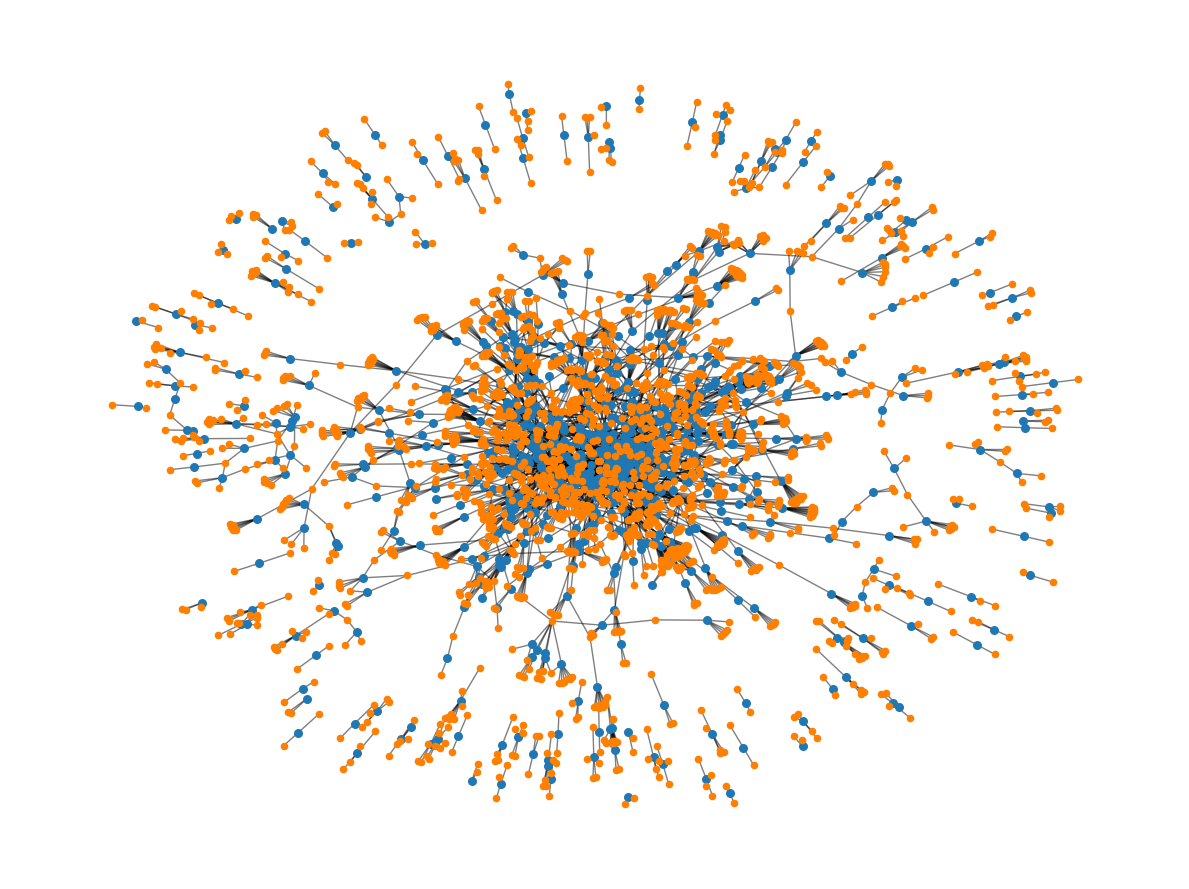

In [63]:
# Determine the nodes for each partition based on the 'bipartite' attribute
article_nodes = [n for n, d in B.nodes(data=True) if d['bipartite']=='article']
entity_nodes = [n for n, d in B.nodes(data=True) if d['bipartite']=='entity']

# Create the bipartite layout
pos = nx.spring_layout(B, k=0.030,
                       seed=34)

# Draw the graph
plt.figure(figsize=(12, 9))

# Nodes
nx.draw_networkx_nodes(
    B, pos, nodelist=article_nodes, node_color='#1f78b4', node_size=30
)
nx.draw_networkx_nodes(
    B, pos, nodelist=entity_nodes, node_color='#ff7f00', node_size=20,
    # alpha=0.7
)

# Edges
nx.draw_networkx_edges(B, pos, width=1, alpha=0.5)  # added alpha for transparency

# If you want to show labels, uncomment the following line. Given the bipartite nature, it might clutter the visualization.
# nx.draw_networkx_labels(B, pos, font_size=12, font_family='sans-serif')

plt.axis('off')
plt.tight_layout()
plt.savefig('bipartite_graph.png', dpi=100)
plt.show()

## Entity Projection

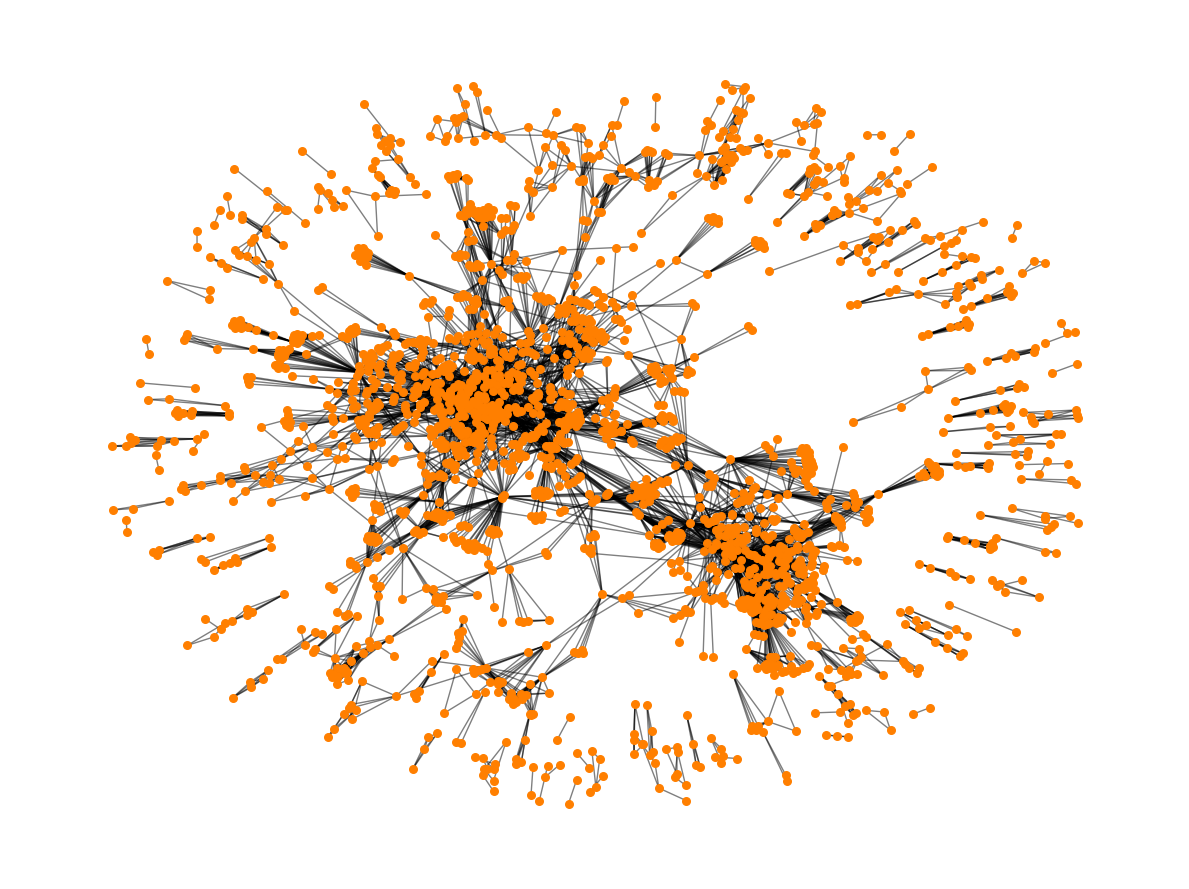

In [57]:
# 1. Create the entity projection
# Project the bipartite graph onto the entities nodes
entity_projection = news_network.convert_to_projection(kind='entity')

# 2. Visualize the entity projection graph
# Use the spring layout for positioning
pos = nx.spring_layout(entity_projection, k=0.07,
                       seed=34)

plt.figure(figsize=(12, 9))

# Draw nodes and edges
nx.draw_networkx_nodes(entity_projection, pos, node_color='#ff7f00',
                       node_size=30)
nx.draw_networkx_edges(entity_projection, pos, alpha=0.5)

# Labels can be added if desired, but with many nodes, it might be cluttered.
# If you want to show labels for specific important nodes or all nodes, you can uncomment the following line.
# nx.draw_networkx_labels(entity_projection, pos, font_size=10, font_family='sans-serif')

# plt.title("Entity Projection Graph")
plt.axis('off')
plt.tight_layout()
plt.savefig('entity_projection_graph.png', dpi=100)
plt.show()

## Article Projection

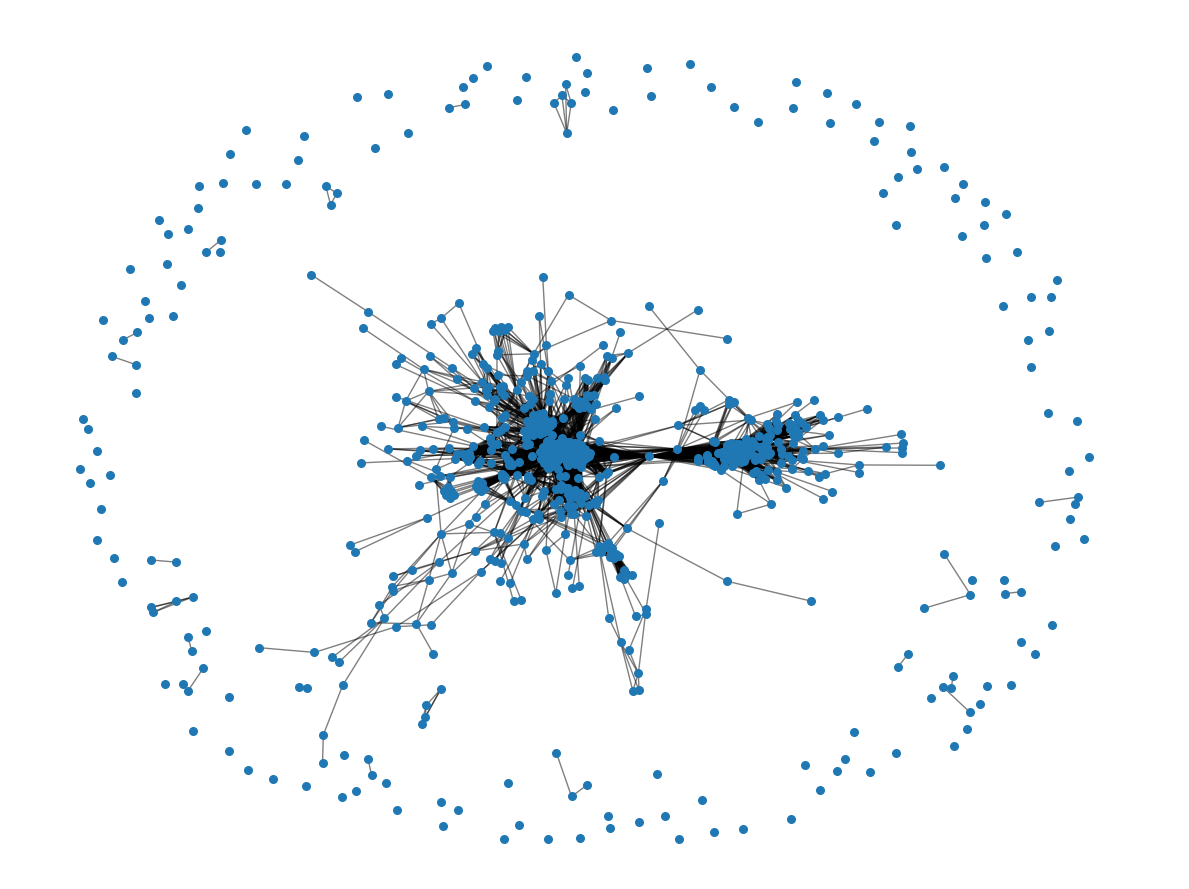

In [60]:
# 1. Create the article projection
# Project the bipartite graph onto the article nodes
article_projection = news_network.convert_to_projection(kind='article')

# 2. Visualize the article projection graph
# Use the spring layout for positioning
pos = nx.spring_layout(article_projection, k=0.09,
                       seed=34)

plt.figure(figsize=(12, 9))

# Draw nodes and edges
nx.draw_networkx_nodes(article_projection, pos, node_color='#1f78b4',
                       node_size=30)
nx.draw_networkx_edges(article_projection, pos, alpha=0.5)

# Labels can be added if desired, but with many nodes, it might be cluttered.
# If you want to show labels for specific important nodes or all nodes, you can uncomment the following line.
# nx.draw_networkx_labels(article_projection, pos, font_size=10, font_family='sans-serif')

# plt.title("Article Projection Graph")
plt.axis('off')
plt.tight_layout()
plt.savefig('article_projection_graph.png', dpi=100)
plt.show()

